<a href="https://colab.research.google.com/github/vikash18086/Capstone/blob/master/Capstone_6th_dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/drive/My Drive/IIITD/Capstone/2015_16_Districtwise.csv' .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/My Drive/IIITD/Capstone/2015_16_Districtwise.csv': No such file or directory


In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from numpy import linalg as LA
import numpy.linalg as linalg
import copy
from collections import defaultdict
from matplotlib import pyplot as plt

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.express as px
from collections import defaultdict
import pickle
import seaborn as sns
import random

%matplotlib inline

In [0]:
#Make hashing corresponding to features.
metadata = pd.read_csv("2015_16_Statewise_Elementary_Metadata.csv")
metadata_hash = {}
for i in range(len(metadata)):
    metadata_hash[metadata.iat[i,0]] = metadata.iat[i,1]

In [0]:
statewise = pd.read_csv('2015_16_Districtwise.csv')
distname = list(statewise['DISTNAME'])
statename = list(statewise['STATNAME'])
statewise = statewise.drop('AC_YEAR', axis=1)
statewise = statewise.drop('STATCD', axis=1)
statewise = statewise.drop('DISTCD', axis=1)
statewise = statewise.drop('DISTNAME', axis=1)
statewise = statewise.drop('DISTRICTS', axis=1)
statewise = statewise.drop('STATNAME', axis=1)
statewise = statewise.drop('BLOCKS', axis=1)
statewise = statewise.drop('VILLAGES', axis=1)
statewise = statewise.drop('CLUSTERS', axis=1)

In [3]:
statewise.shape

(680, 810)

In [0]:
label = []
for i,j in zip(statename, distname):
    name = i+' - '+j
    label.append(name)

In [0]:
all_features = list(statewise.columns)
statewise  = statewise.fillna(0)

In [0]:
# Normalization of dataset
x = statewise.values.T
min_max_scaler = preprocessing.Normalizer()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled= x_scaled.tolist()
# df = pd.DataFrame(x_scaled)

In [7]:
len(x_scaled[0])

680

### Data visualization and clustering

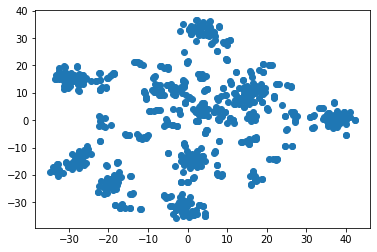

In [8]:
#TSNE PLOTS
dataset=copy.deepcopy(x_scaled)

X_embedded = TSNE(n_components=2).fit_transform(dataset)

x= [i[0] for i in X_embedded]
y= [i[1] for i in X_embedded]

plt.scatter(x,y)
plt.show()

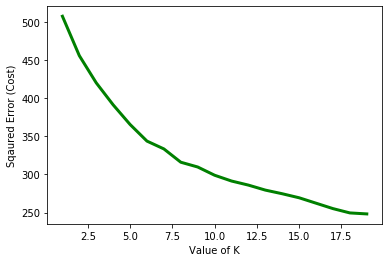

In [9]:
#Here we find out best k value to perform kmeans clustering.
cost =[] 
for i in range(1, 20): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(dataset) 
    cost.append(KM.inertia_)  

plt.plot(range(1, 20), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

In [10]:
#APPLY KMEANS AND PLOT CLUSTERS
kmeans = KMeans(n_clusters=15, random_state=0).fit(dataset)  
# kmeans.labels_

knn_labels = list(kmeans.labels_)

cluster_name = defaultdict(list) 
for i,j in zip(knn_labels,label):
    try:
        cluster_name[i].append(j)
    except:
        cluster_name[i] = j

df = pd.DataFrame(list(zip(x, y,knn_labels,label)), columns =['X', 'Y','Label','distname']) 
fig = px.scatter(df, x='X', y='Y', color='Label')
fig.show()

### Feature selection based on variance

In [0]:
dataset = np.array(dataset).T

In [0]:
# Calculating the variance for the features
feature_var=[]
for i in np.array(dataset):
    feature_var.append(np.std(i)**2)

In [0]:
threshold = 0.003
features=[]
for i in range(len(feature_var)):
    if feature_var[i] > threshold:
        features.append(i)

In [0]:
selected_features = []
for i in range(len(all_features)):
    if i in features:
        selected_features.append(all_features[i])

In [15]:
len(selected_features)

35

In [0]:
final_dataset = []
for i in selected_features:
    final_dataset.append(list(statewise[i]))

In [0]:
data2 = list(zip(*final_dataset))

In [18]:
df = pd.DataFrame(data2, columns =selected_features) 
df.head()

,SCH7P,ENR3G,ENRTOTG,ENR1P,ENR2P,ENR3P,TCH2G,TCHTOTG,ROAD3,ROAD6,ROAD7,SWAT5,TCHM6,TCHM7,ENRG1,ENRG3,PREP,PRESTD,PPFTCH,SPC1,AUC2,SPC6,LOC6,MEC6,CPC6,LVC8,HEC8,TOTCLGD1G,TOTCLGD2G,TOTCLOT1G,TCHBS2,TCHGD6,TCHRM3,TCHRM4,TCHRM7
0,0,23,86180,8071,21139,299,4093,7362,2,68,41,1,819,534,18986,134,1047,18000,211,67,0,24,47,20,1,49,14,2413,3405,117,0,547,26,8,534
1,0,354,89329,10072,46616,7855,3852,8476,9,165,65,5,1578,576,22210,3985,1998,30671,1575,65,2,41,50,36,12,113,33,2757,3915,195,0,1445,130,5,571
2,0,25,17674,4946,29392,20785,1442,3090,36,261,9,0,1107,50,4388,9940,875,35467,2161,31,0,16,10,9,1,136,13,741,2900,97,0,3133,280,0,50
3,0,544,57684,3307,16809,3037,2691,5526,10,98,56,1,898,497,12092,1677,1285,21352,601,38,5,11,30,18,0,70,6,1680,2880,40,0,809,98,6,497
4,0,0,28026,1570,12790,2057,1603,3638,4,93,42,2,944,400,6307,922,888,20018,588,41,1,9,19,23,1,76,6,1149,1847,41,0,779,63,29,391


In [0]:
export_csv = df.to_csv (r'selected_features_5_Dec.csv', index = None, header=True) 

### converting numerical to categorical

In [20]:
statewise = pd.read_csv('selected_features_5_Dec.csv')
statewise.head()

,SCH7P,ENR3G,ENRTOTG,ENR1P,ENR2P,ENR3P,TCH2G,TCHTOTG,ROAD3,ROAD6,ROAD7,SWAT5,TCHM6,TCHM7,ENRG1,ENRG3,PREP,PRESTD,PPFTCH,SPC1,AUC2,SPC6,LOC6,MEC6,CPC6,LVC8,HEC8,TOTCLGD1G,TOTCLGD2G,TOTCLOT1G,TCHBS2,TCHGD6,TCHRM3,TCHRM4,TCHRM7
0,0,23,86180,8071,21139,299,4093,7362,2,68,41,1,819,534,18986,134,1047,18000,211,67,0,24,47,20,1,49,14,2413,3405,117,0,547,26,8,534
1,0,354,89329,10072,46616,7855,3852,8476,9,165,65,5,1578,576,22210,3985,1998,30671,1575,65,2,41,50,36,12,113,33,2757,3915,195,0,1445,130,5,571
2,0,25,17674,4946,29392,20785,1442,3090,36,261,9,0,1107,50,4388,9940,875,35467,2161,31,0,16,10,9,1,136,13,741,2900,97,0,3133,280,0,50
3,0,544,57684,3307,16809,3037,2691,5526,10,98,56,1,898,497,12092,1677,1285,21352,601,38,5,11,30,18,0,70,6,1680,2880,40,0,809,98,6,497
4,0,0,28026,1570,12790,2057,1603,3638,4,93,42,2,944,400,6307,922,888,20018,588,41,1,9,19,23,1,76,6,1149,1847,41,0,779,63,29,391


In [0]:
all_features = list(statewise.columns)

In [0]:
data = []
# data.append(statename)
for i in all_features:
    value = list(statewise[i])
    minval = statewise[i].min()
    maxval = statewise[i].max()
    
    split = (maxval - minval)/5
    range1 = split + minval; range2 = range1 + split; range3 = range2 + split; range4 = range3 + split;
    
#     print("minval : ",minval,", maxval : ",maxval)
    col = []
    for i1 in value:    
        if ((i1 >= minval) and (i1 < range1)):
            col.append("low")
        elif ((i1 >=range1) and (i1 < range2)):
            col.append("low-medium")
        elif ((i1 >=range2) and (i1 < range3)):
            col.append("medium")
        elif ((i1 >=range3) and (i1 < range4)):
            col.append("high-medium")
        else:
            col.append("high")
        # if(i1 < range3):
        #   col.append(0)
        # else:
        #   col.append(1)
  
    data.append(col)

In [0]:
data1 = np.array(data)
all_features = list(statewise.columns)
#convert col wise list to row wise list 
data2 = list(zip(*data))

In [24]:
df = pd.DataFrame(data2, columns =all_features) 
df.head()

,SCH7P,ENR3G,ENRTOTG,ENR1P,ENR2P,ENR3P,TCH2G,TCHTOTG,ROAD3,ROAD6,ROAD7,SWAT5,TCHM6,TCHM7,ENRG1,ENRG3,PREP,PRESTD,PPFTCH,SPC1,AUC2,SPC6,LOC6,MEC6,CPC6,LVC8,HEC8,TOTCLGD1G,TOTCLGD2G,TOTCLOT1G,TCHBS2,TCHGD6,TCHRM3,TCHRM4,TCHRM7
0,low,low,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low
1,low,low,low,low,low,low,low-medium,low-medium,low,low,low,low,low,low,low,low,low-medium,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low
2,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low-medium,low,low,low
3,low,low,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low
4,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low


In [0]:
export_csv = df.to_csv (r'association_input_5_Dec.csv', index = None, header=True) 

### Read association_input file

In [26]:
statewise = pd.read_csv('association_input_5_Dec.csv')
statewise.head()

,SCH7P,ENR3G,ENRTOTG,ENR1P,ENR2P,ENR3P,TCH2G,TCHTOTG,ROAD3,ROAD6,ROAD7,SWAT5,TCHM6,TCHM7,ENRG1,ENRG3,PREP,PRESTD,PPFTCH,SPC1,AUC2,SPC6,LOC6,MEC6,CPC6,LVC8,HEC8,TOTCLGD1G,TOTCLGD2G,TOTCLOT1G,TCHBS2,TCHGD6,TCHRM3,TCHRM4,TCHRM7
0,low,low,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low
1,low,low,low,low,low,low,low-medium,low-medium,low,low,low,low,low,low,low,low,low-medium,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low
2,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low-medium,low,low,low
3,low,low,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low
4,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low


In [0]:
features = statewise.columns
dataset = statewise.values.tolist()
records = dataset

In [28]:
len(records)

680

In [0]:
records = []
for i in range(len(dataset)):
    row = []
    for j in range(len(dataset[0])):
        s = features[j]+'_'+ dataset[i][j]
        row.append(s)
    records.append(row)

In [30]:
 !pip install efficient-apriori

In [0]:
from efficient_apriori import apriori

itemsets, rules = apriori(records, min_support=0.90, min_confidence=1)

In [32]:
len(rules)

54

In [33]:
rules

[{ENR3G_low} -> {TCHRM3_low},
 {TCHRM7_low} -> {SCH7P_low},
 {ENR3G_low, ROAD3_low} -> {TCHRM3_low},
 {ENR3G_low, ROAD6_low} -> {TCHRM3_low},
 {ENR3G_low, TCHBS2_low} -> {TCHRM3_low},
 {ENR3G_low, TCHGD6_low} -> {TCHM6_low},
 {ENR3G_low, TCHGD6_low} -> {TCHRM3_low},
 {ENR3G_low, TCHM6_low} -> {TCHRM3_low},
 {ENR3P_low, TCHRM3_low} -> {ROAD3_low},
 {ENRG3_low, TCHRM3_low} -> {ROAD3_low},
 {ROAD7_low, TCHRM7_low} -> {SCH7P_low},
 {TCHGD6_low, TCHRM3_low} -> {TCHM6_low},
 {ENR2P_low, TCHGD6_low, TCHRM3_low} -> {TCHM6_low},
 {ENR3G_low, ROAD3_low, ROAD6_low} -> {TCHRM3_low},
 {ENR3G_low, ROAD3_low, TCHM6_low} -> {TCHRM3_low},
 {ENR3G_low, ROAD6_low, TCHM6_low} -> {TCHRM3_low},
 {ENR3G_low, TCHGD6_low, TCHRM3_low} -> {TCHM6_low},
 {ENR3G_low, TCHGD6_low, TCHM6_low} -> {TCHRM3_low},
 {ENR3G_low, TCHGD6_low} -> {TCHM6_low, TCHRM3_low},
 {ENR3P_low, ENRG3_low, TCHRM3_low} -> {ROAD3_low},
 {ENR3P_low, ROAD6_low, TCHRM3_low} -> {ROAD3_low},
 {ENR3P_low, TCHBS2_low, TCHRM3_low} -> {ROAD3_low},
 {

In [34]:
store_rule = []
store_info = [] 
rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 1, rules)
print("Rules generated By assosiation pattern mining along with confidence, support, lift value are as follows:")
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule)
    conf = rule.confidence 
    supp  = rule.support
    lift = rule.lift
    x = str(str(str(str(rule).split('(')[0]).replace('{','')).replace('}','')).replace(' ->',',')
    y = str(x.replace(' ','')).split(',')
    y_ = []
    for i in y:
        y_.append(i.split('_')[0])
        
    store_info.append([y_,conf,supp,lift])
    store_rule.append(rule)

Rules generated By assosiation pattern mining along with confidence, support, lift value are as follows:
{ENR3G_low, ROAD3_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.916, lift: 1.035, conv: 33823529.412)
{ENR3G_low, ROAD6_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.903, lift: 1.035, conv: 33823529.412)
{ENR3G_low, TCHBS2_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.903, lift: 1.035, conv: 33823529.412)
{ENR3G_low, TCHM6_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.910, lift: 1.035, conv: 33823529.412)
{TCHGD6_low, TCHRM3_low} -> {TCHM6_low} (conf: 1.000, supp: 0.944, lift: 1.035, conv: 33823529.412)
{ENR2P_low, TCHGD6_low, TCHRM3_low} -> {TCHM6_low} (conf: 1.000, supp: 0.906, lift: 1.035, conv: 33823529.412)
{ENR3G_low, ROAD3_low, TCHM6_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.904, lift: 1.035, conv: 33823529.412)
{ENR3G_low, ROAD6_low, TCHM6_low} -> {TCHRM3_low} (conf: 1.000, supp: 0.901, lift: 1.035, conv: 33823529.412)
{ENRG3_low, TCHGD6_low, TCHRM3_low} -> {TCHM6_low} (conf: 1.000, su

In [35]:
store_info[0]

[['ENR3G', 'ROAD3', 'TCHRM3'], 1.0, 0.9161764705882353, 1.035007610350076]

### Apply Random-Forest Feature selection followed by Apriori

In [0]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble.forest import RandomForestClassifier

In [0]:
statewise = pd.read_csv('2015_16_Districtwise.csv')

distname = list(statewise['DISTNAME'])
statename = list(statewise['STATNAME'])
statewise = statewise.drop('AC_YEAR', axis=1)
statewise = statewise.drop('STATCD', axis=1)
statewise = statewise.drop('DISTCD', axis=1)
statewise = statewise.drop('DISTNAME', axis=1)
statewise = statewise.drop('DISTRICTS', axis=1)
statewise = statewise.drop('STATNAME', axis=1)
statewise = statewise.drop('BLOCKS', axis=1)
statewise = statewise.drop('VILLAGES', axis=1)
statewise = statewise.drop('CLUSTERS', axis=1)

label = []
for i,j in zip(statename, distname):
    name = i+' - '+j
    label.append(name)

all_features = list(statewise.columns)
statewise  = statewise.fillna(0)

In [0]:
feature_label = statewise.columns

In [39]:
statewise.head()

,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,SCH3P,SCH4P,SCH5P,SCH6P,SCH7P,SCH9P,SCHTOTP,...,ENRE52,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,875564.0,11.33,197001.90,34.62,843.0,0.12,8.08,66.92,54.79,77.10,2379.0,135672.0,72701.0,1107,818,2,14,2,84,49,0,2076,980,697,1,14,2,49,49,0,1792,127,121,1,0,0,35,0,0,284,...,0,0,0,0,0,0,78,26,104,35,2,37,6,0,6,86,4,92,33,453,57,59116,11,9749,46949,27,7534,27433,27,3472,21322,26,2594,3489,5315,27,62,23,852,239
1,1015503.0,17.19,161871.18,20.34,873.0,0.15,3.74,66.93,55.01,77.35,4243.0,117874.0,70952.0,1215,825,9,11,5,176,69,0,2310,1108,639,1,11,5,96,69,0,1929,107,186,8,0,0,80,0,0,381,...,0,0,0,0,0,0,118,90,208,63,32,95,5,1,6,122,2,222,98,313,40,53237,0,4406,38161,0,3801,26138,0,1763,17307,0,1571,4127,5800,210,53,30,1665,360
2,1269751.0,98.73,155798.45,23.56,879.0,0.09,0.72,71.21,63.47,77.95,1979.0,113560.0,62397.0,258,417,36,2,0,263,9,0,985,203,209,1,2,0,65,9,0,489,55,208,35,0,0,198,0,0,496,...,0,0,0,0,0,0,59,216,275,85,151,236,11,12,23,14,0,81,36,375,54,13624,227,1266,15286,276,1251,6370,34,429,5444,31,408,817,3284,886,11,0,2873,40
3,735753.0,11.74,150755.79,21.18,883.0,0.05,3.17,57.98,46.60,68.56,1361.0,118477.0,58838.0,755,537,10,10,1,98,57,0,1468,697,423,1,10,1,40,57,0,1229,56,114,9,0,0,58,0,0,237,...,0,0,0,0,0,0,100,41,141,44,9,53,0,0,0,41,1,62,20,143,18,37707,0,3098,27383,0,2411,17795,18,1052,12469,18,857,2290,3837,119,45,8,1035,325
4,570060.0,13.80,97651.28,29.18,913.0,0.07,4.03,65.00,53.81,75.41,1086.0,64493.0,30166.0,532,339,4,14,2,94,43,0,1028,497,233,0,14,2,23,43,0,812,35,106,4,0,0,71,0,0,216,...,0,0,0,0,0,0,83,32,115,46,7,53,3,0,3,15,1,17,8,37,9,20123,132,2775,16660,44,2531,9438,62,1004,7408,17,855,1688,2584,151,67,5,1101,209


In [0]:
X = np.array(statewise)
Y = label
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100)).fit(X,Y)

In [0]:
#return boolean value corresponding to index of selected features
sel_feat = list(sel.get_support())
#select features return by Random forest 
selected_features = []
for i,j in zip(sel_feat,all_features):
  if i:
    selected_features.append(j)

In [49]:
len(selected_features)

363

In [0]:
random.shuffle(selected_features)

In [0]:
if len(selected_features) > 50:
  selected_features = selected_features[:50]

In [54]:
np.array(selected_features)

array(['STPTOT_G', 'TCHCON3', 'SCHTOTP', 'ENRE24', 'TCHPG1', 'BLC1',
       'OBPTOT', 'ENR7PR', 'TOTCLS5G', 'ENR7', 'SCH2M', 'C8_GR',
       'TCHTOTP', 'TCH6M', 'C9_GR', 'PTXT_ST', 'SCLSTOT', 'SRAMN4',
       'TCHCON1', 'SCUTOT_G', 'SPC7', 'SCLS1', 'TCHSTM5', 'C1_G',
       'TCH_5758F', 'TCH_TRNRF7', 'TLM_R2', 'TLM_R1', 'TCH1', 'SCOMP1',
       'TCHSEC1', 'CLS6', 'OBUTOT', 'SCH2P', 'BLC4', 'TCHHS7', 'ENRE43',
       'SRAMN1', 'MALE_LIT', 'MEC8', 'TLM_R4', 'PTXT_SC', 'MUPTOT',
       'LVC3', 'SRAM7', 'SCH4G', 'ENR504', 'TCHMD4', 'ENRG6', 'LVC6'],
      dtype='<U10')

In [0]:
features_name= []
for i in selected_features:
  try:
    features_name.append(metadata_hash[i])
  except:
    pass

In [0]:
x= [selected_features,features_name]

In [0]:
x = np.array(x)
data2 = list(zip(*x))

In [75]:
df = pd.DataFrame(data2) 
df.head()

,0,1
0,STPTOT_G,ST Enrolment: Primary - Girls
1,TCHCON3,Contractual Teachers by Qualification: Below S...
2,SCHTOTP,Schools by Category: Private : Total
3,ENRE24,Medium of Instruction: Enrolment in Medium 2 -...
4,TCHPG1,Teachers by Educational Qualification: Post Gr...


In [0]:
export_csv = df.to_csv (r'features.csv', index = None, header=True) 

In [77]:
final_dataset = []
for i in selected_features:
    final_dataset.append(list(statewise[i]))

data2 = list(zip(*final_dataset))

df = pd.DataFrame(data2, columns =selected_features)
export_csv = df.to_csv (r'selected_features_5_Dec.csv', index = None, header=True) 
df.head()

,STPTOT_G,TCHCON3,SCHTOTP,ENRE24,TCHPG1,BLC1,OBPTOT,ENR7PR,TOTCLS5G,ENR7,SCH2M,C8_GR,TCHTOTP,TCH6M,C9_GR,PTXT_ST,SCLSTOT,SRAMN4,TCHCON1,SCUTOT_G,SPC7,SCLS1,TCHSTM5,C1_G,TCH_5758F,TCH_TRNRF7,TLM_R2,TLM_R1,TCH1,SCOMP1,TCHSEC1,CLS6,OBUTOT,SCH2P,BLC4,TCHHS7,ENRE43,SRAMN1,MALE_LIT,MEC8,TLM_R4,PTXT_SC,MUPTOT,LVC3,SRAM7,SCH4G,ENR504,TCHMD4,ENRG6,LVC6
0,5023,327,284,0,408,10,6983,0,23,2386,0,0,2395,0,0,9749,72,1,0,0,27,72,0,11102,2,0,19,45,2708,23,79,852,3071,121,1,28,0,272,77.10,9,0,11,88797,55,21,14,13,0,6872,45
1,2453,141,381,0,670,8,25171,0,30,2877,0,9,4232,0,25,4406,89,2,0,0,32,86,4,19911,32,12,88,170,2937,24,0,1665,10574,186,2,32,0,104,77.35,19,0,0,124492,147,34,11,10,0,17319,132
2,594,14,496,0,201,8,1592,0,0,288,0,17,7444,0,18,1266,107,0,0,39,13,100,0,7893,151,0,23,25,828,38,19,2873,730,208,1,0,0,39,77.95,15,0,227,75215,90,1,2,2,0,24879,122
3,1633,89,237,0,464,0,14230,0,8,2282,0,0,2780,0,5,3098,64,2,0,0,18,64,0,7577,9,0,124,172,1878,19,49,1035,5949,114,0,9,0,173,68.56,21,0,0,64618,63,13,10,8,0,7886,49
4,1698,48,216,0,398,1,6462,0,5,1543,0,6,2541,0,0,2775,37,4,0,2,17,36,0,4754,7,10,7,18,1336,18,0,1101,3214,106,0,7,0,125,75.41,18,1,132,40359,69,22,14,13,2,8733,117


### converting numerical to categorical

In [78]:
statewise = pd.read_csv('selected_features_5_Dec.csv')
statewise.head()

all_features = list(statewise.columns)

data = []
# data.append(statename)
for i in all_features:
    value = list(statewise[i])
    minval = statewise[i].min()
    maxval = statewise[i].max()
    
    split = (maxval - minval)/5
    range1 = split + minval; range2 = range1 + split; range3 = range2 + split; range4 = range3 + split;
    
#     print("minval : ",minval,", maxval : ",maxval)
    col = []
    for i1 in value:    
        if ((i1 >= minval) and (i1 < range1)):
            col.append("low")
        elif ((i1 >=range1) and (i1 < range2)):
            col.append("low-medium")
        elif ((i1 >=range2) and (i1 < range3)):
            col.append("medium")
        elif ((i1 >=range3) and (i1 < range4)):
            col.append("high-medium")
        else:
            col.append("high")
        # if(i1 < range3):
        #   col.append(0)
        # else:
        #   col.append(1)
  
    data.append(col)

data1 = np.array(data)
all_features = list(statewise.columns)
#convert col wise list to row wise list 
data2 = list(zip(*data))

df = pd.DataFrame(data2, columns =all_features) 
df.head()

,STPTOT_G,TCHCON3,SCHTOTP,ENRE24,TCHPG1,BLC1,OBPTOT,ENR7PR,TOTCLS5G,ENR7,SCH2M,C8_GR,TCHTOTP,TCH6M,C9_GR,PTXT_ST,SCLSTOT,SRAMN4,TCHCON1,SCUTOT_G,SPC7,SCLS1,TCHSTM5,C1_G,TCH_5758F,TCH_TRNRF7,TLM_R2,TLM_R1,TCH1,SCOMP1,TCHSEC1,CLS6,OBUTOT,SCH2P,BLC4,TCHHS7,ENRE43,SRAMN1,MALE_LIT,MEC8,TLM_R4,PTXT_SC,MUPTOT,LVC3,SRAM7,SCH4G,ENR504,TCHMD4,ENRG6,LVC6
0,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,high-medium,low,low,low,low,low,low,low,low,low,low,low
1,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,high-medium,low,low,low,low-medium,low,low,low,low,low,low,low
2,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,high-medium,low,low,low,low,low,low,low,low,low,low,low
3,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,high-medium,low,low,low,low,low,low,low,low,low,low,low
4,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,high-medium,low,low,low,low,low,low,low,low,low,low,low


In [0]:
# #update df
# df12 = np.array(df) 
# feature_name = df.columns
# for i in range(len(df12)):
#   for j in range(len(df12[i])):
#     df12[i][j] = feature_name[j]+'_'+df12[i][j]
# df = pd.DataFrame(df12, columns =feature_name) 

In [0]:
export_csv = df.to_csv (r'association_input_5_Dec.csv', index = None, header=True) 

### Read association_input file

In [81]:
statewise = pd.read_csv('association_input_5_Dec.csv')
statewise.head()

,STPTOT_G,TCHCON3,SCHTOTP,ENRE24,TCHPG1,BLC1,OBPTOT,ENR7PR,TOTCLS5G,ENR7,SCH2M,C8_GR,TCHTOTP,TCH6M,C9_GR,PTXT_ST,SCLSTOT,SRAMN4,TCHCON1,SCUTOT_G,SPC7,SCLS1,TCHSTM5,C1_G,TCH_5758F,TCH_TRNRF7,TLM_R2,TLM_R1,TCH1,SCOMP1,TCHSEC1,CLS6,OBUTOT,SCH2P,BLC4,TCHHS7,ENRE43,SRAMN1,MALE_LIT,MEC8,TLM_R4,PTXT_SC,MUPTOT,LVC3,SRAM7,SCH4G,ENR504,TCHMD4,ENRG6,LVC6
0,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,high-medium,low,low,low,low,low,low,low,low,low,low,low
1,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,high-medium,low,low,low,low-medium,low,low,low,low,low,low,low
2,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,high-medium,low,low,low,low,low,low,low,low,low,low,low
3,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low-medium,low,low,low,low,low,low,low,low,low,low,low,high-medium,low,low,low,low,low,low,low,low,low,low,low
4,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,low,high-medium,low,low,low,low,low,low,low,low,low,low,low


In [0]:
features = statewise.columns
dataset = statewise.values.tolist()
records = dataset

records = []
for i in range(len(dataset)):
    row = []
    for j in range(len(dataset[0])):
        s = features[j]+'_'+ dataset[i][j]
        row.append(s)
    records.append(row)

In [0]:
itemsets, rules = apriori(records, min_support=0.92, min_confidence=1)

In [92]:
len(rules)

155

In [93]:
store_rule = []
store_info = [] 
rules_rhs = filter(lambda rule: len(rule.lhs) >= 1 and len(rule.rhs) >= 1, rules)
print("Rules generated By assosiation pattern mining along with confidence, support, lift value are as follows:")
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
    print(rule)
    conf = rule.confidence
    supp  = rule.support
    lift = rule.lift
    x = str(str(str(str(rule).split('(')[0]).replace('{','')).replace('}','')).replace(' ->',',')
    y = str(x.replace(' ','')).split(',')
    y_ = []
    for i in y:
        y_.append(i.split('_')[0])
    store_info.append([y_,conf,supp,lift])
    store_rule.append(rule)

Rules generated By assosiation pattern mining along with confidence, support, lift value are as follows:
{CLS6_low, LVC6_low} -> {TCH6M_low} (conf: 1.000, supp: 0.922, lift: 1.003, conv: 2941176.471)
{ENRE24_low, LVC6_low} -> {TCH6M_low} (conf: 1.000, supp: 0.921, lift: 1.003, conv: 2941176.471)
{ENRE43_low, LVC6_low} -> {TCH6M_low} (conf: 1.000, supp: 0.943, lift: 1.003, conv: 2941176.471)
{LVC3_low, LVC6_low} -> {TCH6M_low} (conf: 1.000, supp: 0.944, lift: 1.003, conv: 2941176.471)
{LVC6_low, SCOMP1_low} -> {TCH6M_low} (conf: 1.000, supp: 0.938, lift: 1.003, conv: 2941176.471)
{LVC6_low, TCHCON1_low} -> {TCH6M_low} (conf: 1.000, supp: 0.946, lift: 1.003, conv: 2941176.471)
{LVC6_low, TCHHS7_low} -> {TCH6M_low} (conf: 1.000, supp: 0.938, lift: 1.003, conv: 2941176.471)
{LVC6_low, TCHMD4_low} -> {TCH6M_low} (conf: 1.000, supp: 0.947, lift: 1.003, conv: 2941176.471)
{CLS6_low, ENRG6_low, LVC6_low} -> {TCH6M_low} (conf: 1.000, supp: 0.922, lift: 1.003, conv: 2941176.471)
{ENRE43_low, ENR

In [94]:
store_info[0][0]

['CLS6', 'LVC6', 'TCH6M']

### Pickle dump & load

In [0]:
# pickle dump
itemsets_file = open("itemsets","wb")
pickle.dump(itemsets,itemsets_file)
itemsets_file.close()

rules_file = open("rules","wb")
pickle.dump(rules,rules_file)
rules_file.close()

In [0]:
#pickle load
itemsets_file = open("itemsets",'rb')
itemsets = pickle.load(itemsets_file)
itemsets_file.close()

rules_file = open("rules",'rb')
rules = pickle.load(rules_file)
rules_file.close()

##Visualization

In [0]:
data = pd.read_csv('2015_16_Statewise_Elementary.csv')

In [0]:
#filter out necessary columns
col = ['STATNAME', 'DISTRICTS', 'TOTPOPULAT','SCHTOT','SCHTOTG','SCHTOTGR','SCHTOTPR','ENRTOT','ENRTOTG','ENRTOTGR', 
       'ENRTOTPR', 'TCHTOTG', 'TCHTOTP', 'SCLSTOT', 'STCHTOT', 'ROADTOT', 'SPLAYTOT', 'SWATTOT',  'SELETOT',] 
df = pd.DataFrame(data, columns=col)

In [0]:
#correct the wrong value(population of west bengal)
df.loc[18,'TOTPOPULAT'] = df.loc[18,'TOTPOPULAT']/10

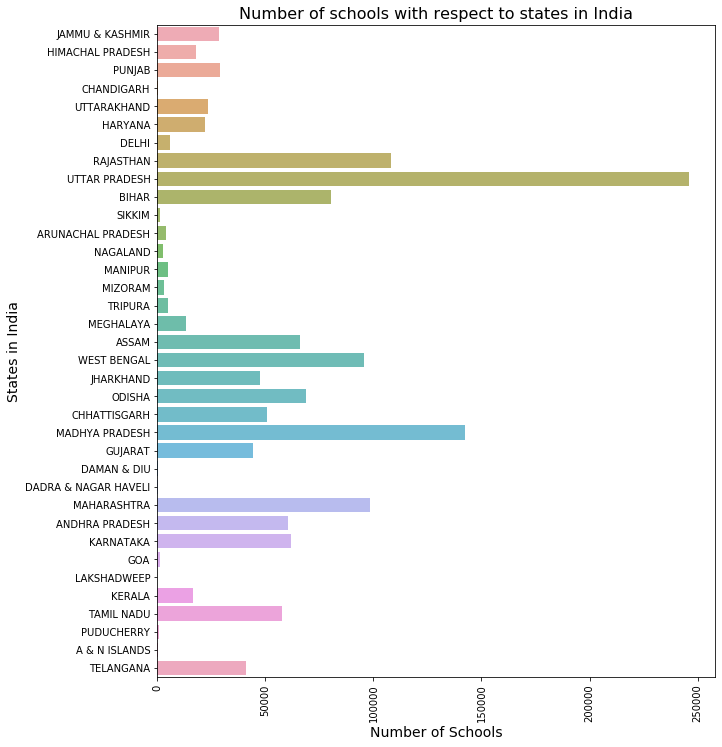

In [101]:
plt.figure(figsize=(10,12))
sns.barplot(df['SCHTOT'], df['STATNAME'],alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Number of Schools', fontsize=14)
plt.ylabel('States in India', fontsize=14)
plt.title("Number of schools with respect to states in India", fontsize=16)
plt.show()

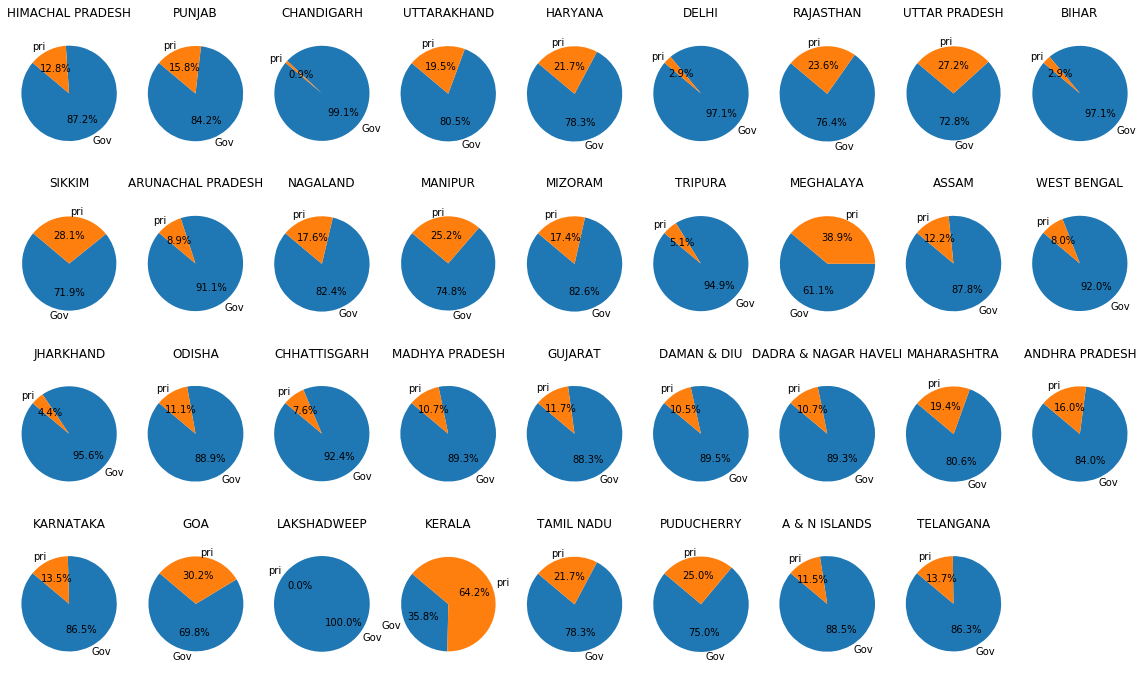

In [102]:
plt.figure(figsize=(20,12))
for i in range(1,len(data)):
    plt.subplot(4,9,i)
    plt.title(df['STATNAME'][i])
    top = ['Gov','pri']
    uttar = data.loc[df['STATNAME'] == df['STATNAME'][i],:]
    value =[float(uttar['SCHTOTG']/uttar['SCHTOT'])*100,float(uttar['SCHTOTPR']/uttar['SCHTOT'])*100]
    plt.pie(value, labels=top, autopct='%1.1f%%',startangle=140)
    plt.axis('equal')
plt.show()

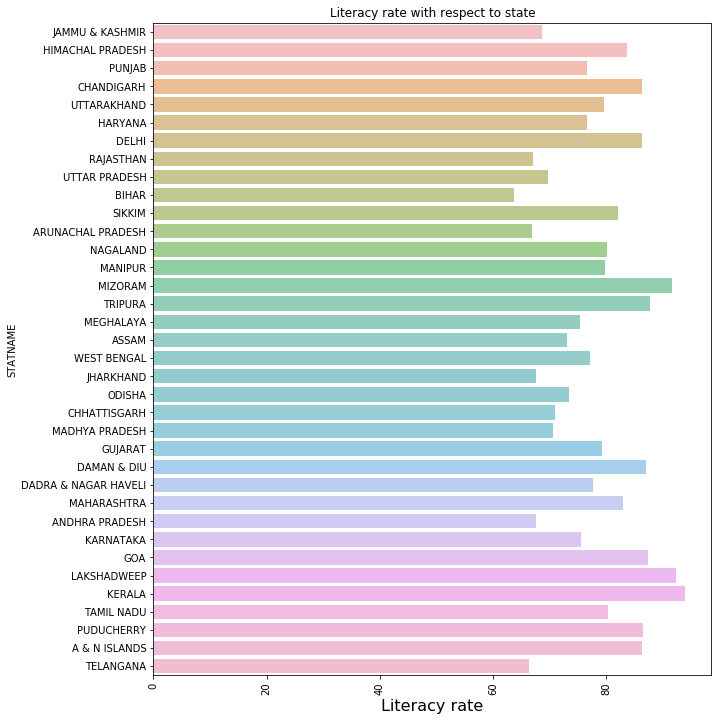

In [103]:
plt.figure(figsize=(10,12))
sns.barplot(data['OVERALL_LI'], data['STATNAME'],alpha=0.6)
plt.xticks(rotation='vertical')
plt.xlabel("Literacy rate", fontsize=16)
plt.title('Literacy rate with respect to state')
plt.show()

In [0]:
#sort value of dataframe based on passed column.
def sort_vals(df,col):
    df_new = df.sort_values(by = col)
    df_new.reset_index().drop('index', axis = 1, inplace = True)
    return df_new

# for plot
def plot_barh(df, col1, col2, size = (10,10), title = None, xlabel = None):
    fig, ax = plt.subplots(1,1,figsize = size)
    plt.barh(df[col1],df[col2],label = col2,color='green')
            
    if title:
        ax.set_title(title)   
    else:
        ax.set_title('{} vs {}'.format(col2, col1))
    if xlabel:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xlabel(col2)

# dislay features description.
def display_desc(row):
    return meta_elementary[meta_elementary['Field name'] == row].Description.values[0]

#### As rule says literacy rate is almost high in all states so here we compare the literacy rate of diff. states. 

In [119]:
elementary = pd.read_csv('2015_16_Statewise_Elementary.csv')
meta_elementary = pd.read_csv('2015_16_Statewise_Elementary_Metadata.csv')
elementary[elementary.GROWTHRATE == -0.47]
#### Nagaland has negative growth rate in 2015-16

,AC_YEAR,STATCD,STATNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,SEXRATIO,P_SC_POP,P_ST_POP,OVERALL_LI,FEMALE_LIT,MALE_LIT,AREA_SQKM,TOT_6_10_15,TOT_11_13_15,SCH1,SCH2,SCH3,SCH4,SCH5,SCH6,SCH7,SCH9,SCHTOT,SCH1G,SCH2G,SCH3G,SCH4G,SCH5G,SCH6G,SCH7G,SCH9G,SCHTOTG,SCH1P,SCH2P,...,ENRE52,ENRE53,ENRE54,ENRE55,ENRE56,ENRE57,PTXT_ALL,PTXT_SC,PTXT_ST,PUNI_ALL,PUNI_SC,PUNI_ST,UTXT_ALL,UTXT_SC,UTXT_ST,UUNI_ALL,UUNI_SC,UUNI_ST,TCH_5556M,TCH_5556F,TCH_5556T,TCH_5758M,TCH_5758F,TCH_5758T,TCH_5960M,TCH_5960F,TCH_5960T,PPTR30,UPTR35,PSCR30,USCR35,NOTCH_ASS,TCHINV,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
12,2015-16,13,NAGALAND,11,47,1478,125,1981,17.31,14.44,-0.47,931,0.0,86.5,80.11,76.69,83.29,16579,239278,109124,1265,786,105,39,46,379,179,0,2799,1146,590,6,39,44,89,178,0,2092,119,196,...,0,0,0,0,0,0,99732,2681,85107,68640,1750,59382,45644,1016,41344,34337,620,31944,229,70,299,93,28,121,6,4,10,93,13,315,233,21056,1454,6588,6152,1772,167,256,3639,781


In [120]:
# difference between male and female literacy rates for each state
(elementary.MALE_LIT - elementary.FEMALE_LIT).describe()
#The standard deviation is pretty large for this and 
#we see that that 50% of the states have difference in 
#male and female literacy rate as more than 13.72 which is pretty high 

count    36.000000
mean     13.893611
std       5.679685
min       3.390000
25%      10.130000
50%      13.720000
75%      18.182500
max      27.850000
dtype: float64

In [0]:
elementary = sort_vals(elementary, 'OVERALL_LI')

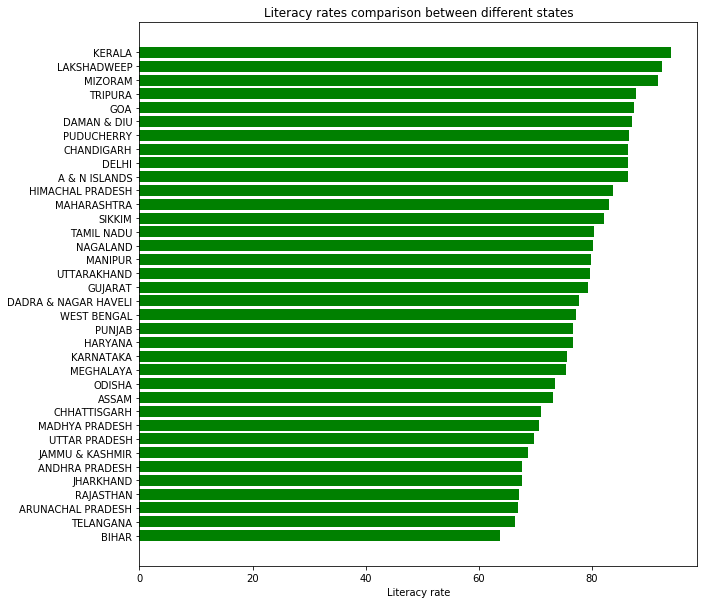

In [122]:
plot_barh(elementary, 'STATNAME', 'OVERALL_LI', title = 'Literacy rates comparison \
between different states' , xlabel = 'Literacy rate')


In [0]:
elementary = sort_vals(elementary, 'OVERALL_LI')

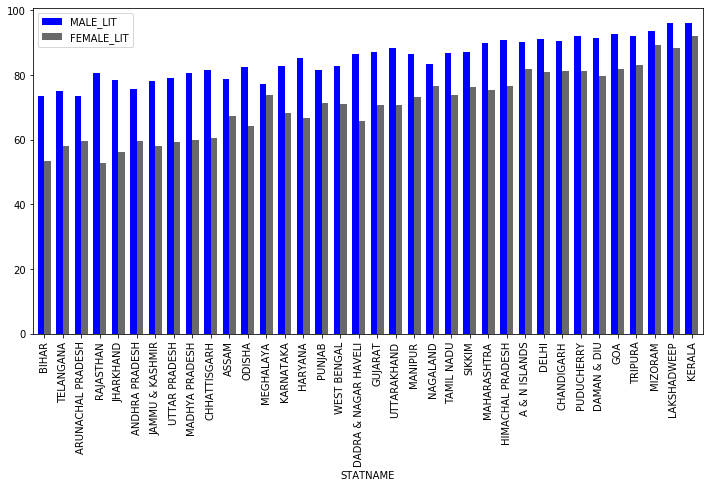

In [125]:
elementary.plot(kind = 'bar',x = 'STATNAME',y = ['MALE_LIT','FEMALE_LIT'],stacked = False,figsize=(12,6),width = 0.7,color = ['Blue','dimgrey'])